# Sample Average Method with E-Greedy Selection

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from action import Action
from typing import List
from tqdm import trange


In [12]:

class Bandit:
    def __init__(self, actions: List[Action], epsilon: float) -> None:
        self.actions = actions
        self.epsilon = epsilon
        self.N = np.zeros(len(actions))
        self.Q = np.zeros(len(actions))
        self.true_optimal_action = np.argmax([action.mean_reward for action in actions])

    def reset(self) -> None:
        self.N = np.zeros(len(self.actions))
        self.Q = np.zeros(len(self.actions))


    def act(self) -> int:
        if np.random.rand() < self.epsilon:
            return np.random.randint(len(self.actions))
        else:
            q_best = np.max(self.Q)
            return np.random.choice(np.where(self.Q == q_best)[0])

    def iterate(self,action_index) -> float:
        # Apply only the selected action
        reward = self.actions[action_index].apply()
        # Update Q-values
        self.N[action_index] += 1
        self.Q[action_index] += (reward - self.Q[action_index]) / self.N[action_index]

        return reward

def simulate(runs, time, bandits):
    rewards = np.zeros((len(bandits), runs, time))
    best_action_counts = np.zeros(rewards.shape)
    for i, bandit in enumerate(bandits):
        for r in trange(runs):
            bandit.reset()
            for t in range(time):
                action = bandit.act()
                reward = bandit.iterate(action)
                rewards[i, r, t] = reward
                if action == bandit.true_optimal_action:
                    best_action_counts[i, r, t] = 1
    mean_best_action_counts = best_action_counts.mean(axis=1)
    mean_rewards = rewards.mean(axis=1)
    return mean_best_action_counts, mean_rewards


<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:18: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:18: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_199255/3000285038.py:11: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(rewards, label='$\epsilon = %.02f$' % (eps))
/tmp/ipykernel_199255/3000285038.py:18: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(counts, label='$\epsilon = %.02f$' % (eps))
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:11<00:00, 28.15it/s]


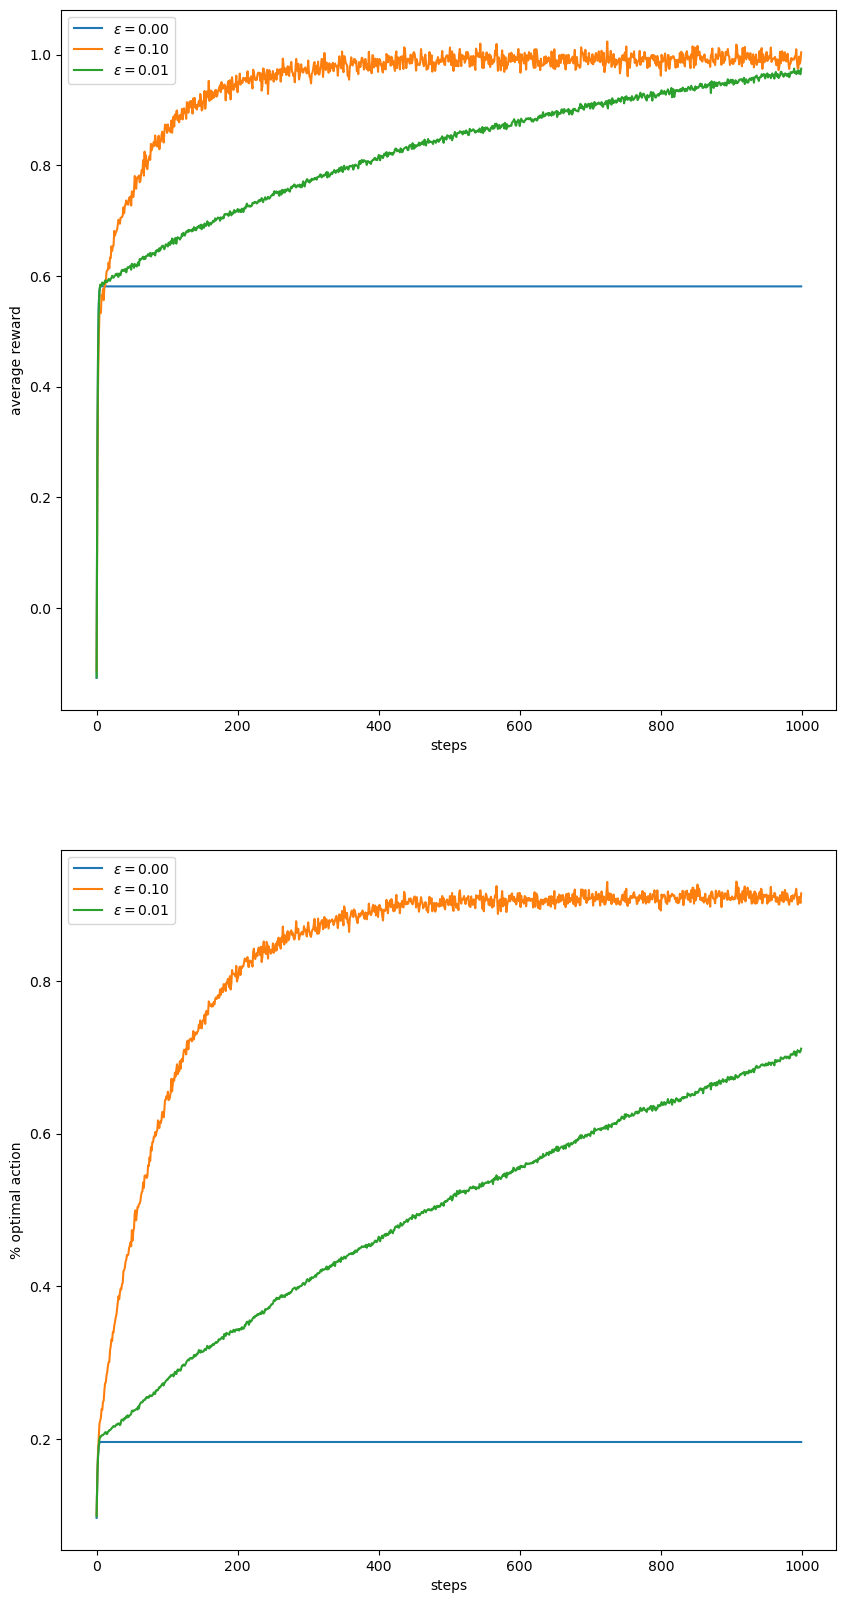

In [10]:
epsilons = [0, 0.1, 0.01]
runs = 2000
time = 1000
actions = [Action(np.random.randn(), 0.0) for _ in range(10)]
bandits = [Bandit(epsilon=eps, actions=actions) for eps in epsilons]
best_action_counts, rewards = simulate(runs, time, bandits)

plt.figure(figsize=(10, 20))
plt.subplot(2, 1, 1)
for eps, rewards in zip(epsilons, rewards):
    plt.plot(rewards, label='$\epsilon = %.02f$' % (eps))
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend()

plt.subplot(2, 1, 2)
for eps, counts in zip(epsilons, best_action_counts):
    plt.plot(counts, label='$\epsilon = %.02f$' % (eps))
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()

plt.show()